In [1]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('Enter phystech e-mail\n') 
    seed = crc32(mail.strip().encode('utf-8'))%(2**32 - 1)
    rs = np.random.RandomState(seed)
    print('Your tasks are:')
    print(
        '1.{}, 2.{}, 3.{}, 4.{}'.format(
            rs.randint(low=1, high=4), 
            rs.randint(low=1, high=3), 
            rs.randint(low=1, high=3), 
            rs.randint(low=1, high=3)))

Enter phystech e-mail
voskanian.dt@phystech.edu
Your tasks are:
1.1, 2.1, 3.2, 4.1


In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import scipy.stats as st

from statsmodels.formula.api import ols

In [102]:
data = []
dirpath = r'/Users/admin/Downloads/images_full/images'
for _, _, files in os.walk(dirpath):
    for file in files:
        if file[:8] == 'modified':
            number = re.sub('[^\d+]', '', file)
            word = re.sub('[^a-z]', '', file[8:])[:-3]
            for file2 in files:
                if number in file2  and file2[:8] == 'original':
                    break
            data.append((file2, file, word))
            #print((file2, file, word))

In [103]:
print("size of data = {}".format(len(data)))

size of data = 1000


### с помощью t-test с $H_0 : \mu = 0, H_1 : \mu \neq 0$ посмотрим какие modified файлы содержат зашифрованные слова

### посмотрим что будет при p-value < 0.05 на графике

In [85]:
def check_data(data, p_value=0.05):
    global res
    res = []
    for i in data:
        original = np.int64(Image.open(os.path.join(dirpath, i[0])))
        mod = np.int64(Image.open(os.path.join(dirpath, i[1])))
        p_ttest = st.ttest_1samp((mod - original).flatten(), 0, alternative='two-sided').pvalue
        if p_ttest < p_value:
            print("p_ttest = {}".format(p_ttest))
            plt.hist((mod - original).flatten(), color='orange')
            plt.show()
            res.append(i)
    return res

p_ttest = 0.0


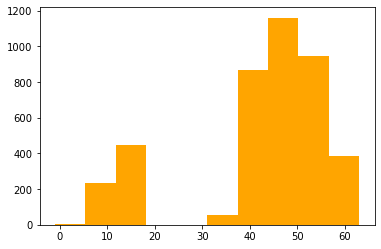

p_ttest = 0.0467139408236342


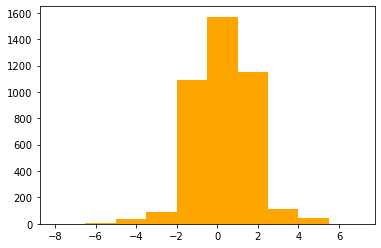

p_ttest = 0.046211001374628295


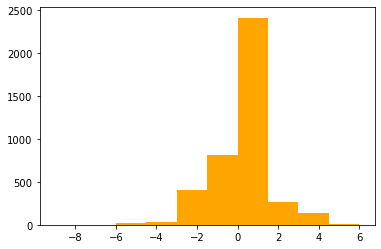

p_ttest = 0.0


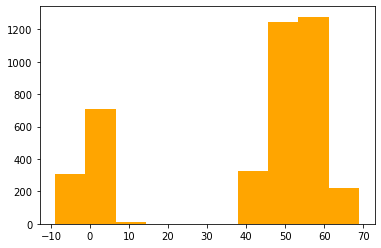

p_ttest = 0.02143803759422195


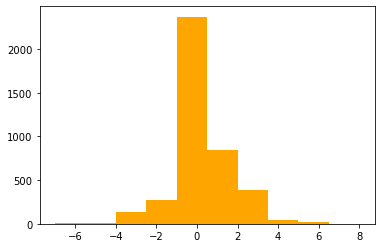

p_ttest = 0.0005317912549809853


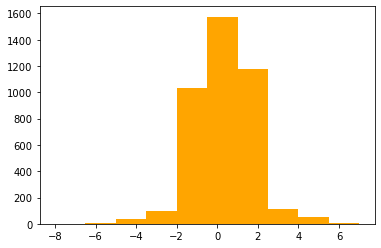

p_ttest = 0.028380364594561554


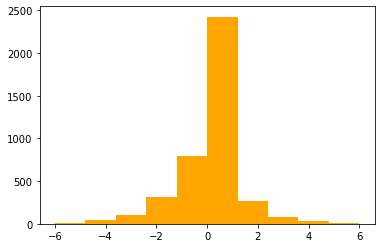

p_ttest = 0.007863252951622662


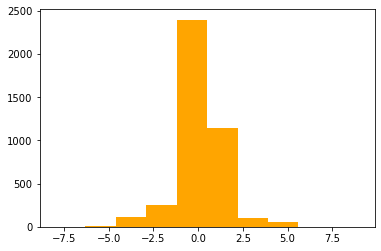

p_ttest = 0.04757579511401254


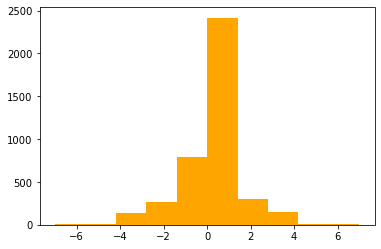

p_ttest = 0.036786890164719706


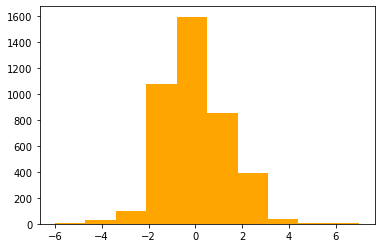

p_ttest = 0.0


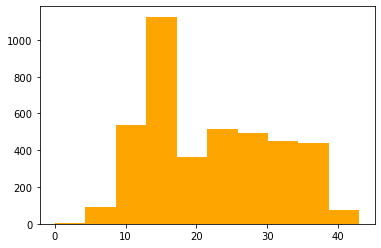

p_ttest = 0.00328435536228076


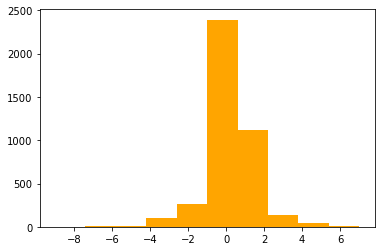

p_ttest = 0.009857701182112774


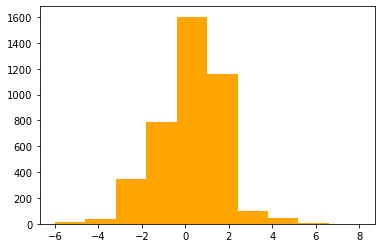

p_ttest = 0.03318854077327377


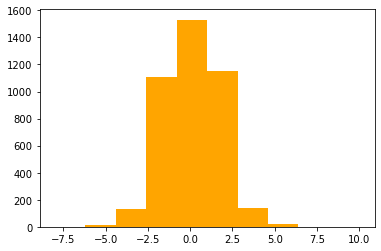

p_ttest = 0.016855402235734937


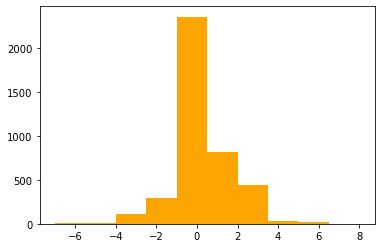

p_ttest = 0.0459841879860685


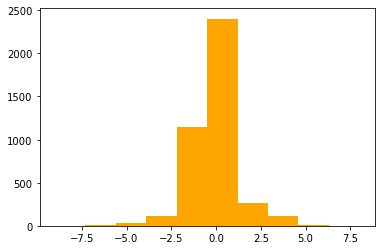

p_ttest = 0.03908560430546401


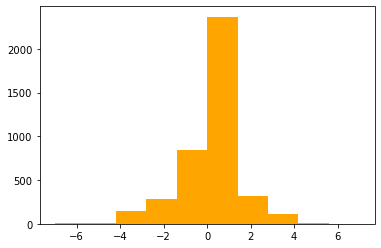

p_ttest = 0.0


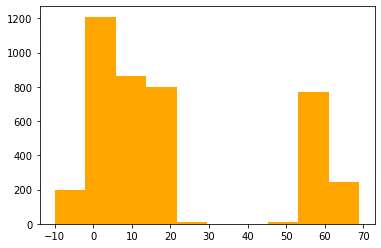

p_ttest = 0.032084676037794684


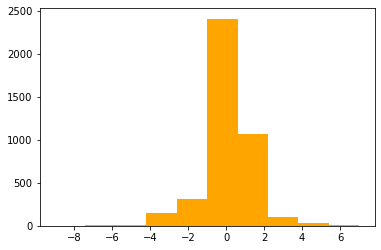

p_ttest = 0.03556761926610345


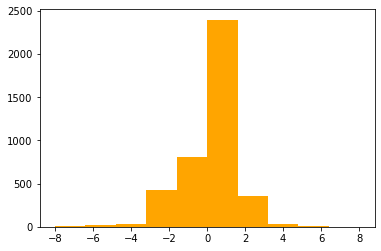

p_ttest = 0.020665532688246228


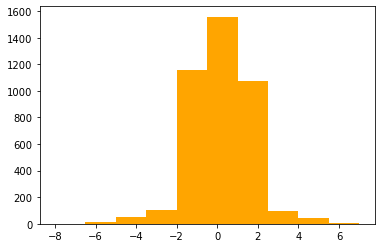

p_ttest = 0.029365264419282017


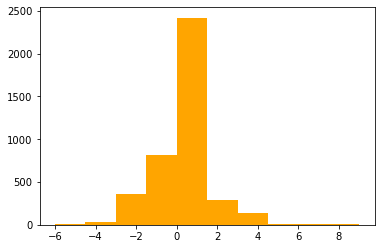

p_ttest = 0.007139873183152549


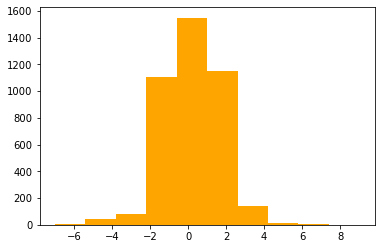

p_ttest = 0.029109910733766963


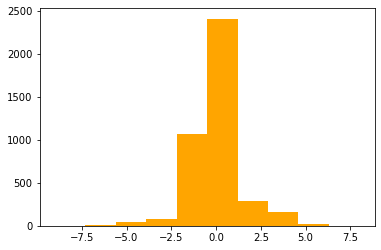

p_ttest = 0.022912394653799257


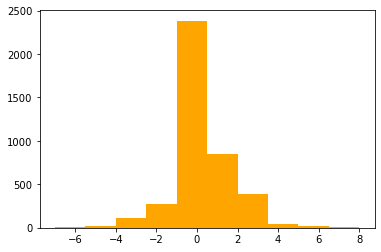

p_ttest = 0.030079468278855465


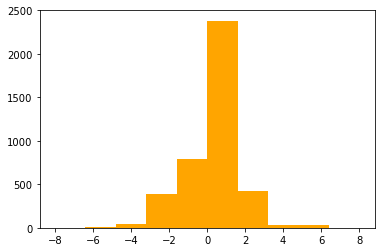

p_ttest = 0.04885962353790321


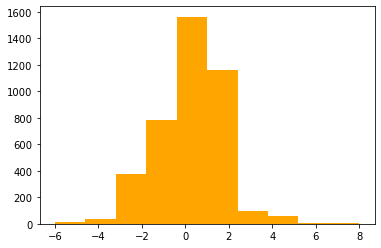

p_ttest = 0.047119953281396974


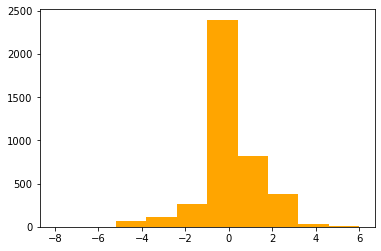

p_ttest = 0.04458910163247434


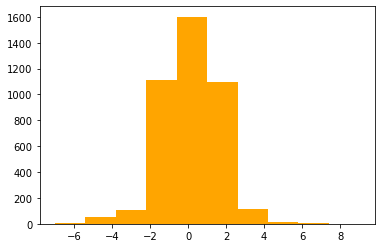

p_ttest = 0.019218597019270107


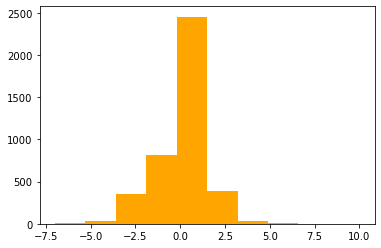

p_ttest = 0.027927518393451804


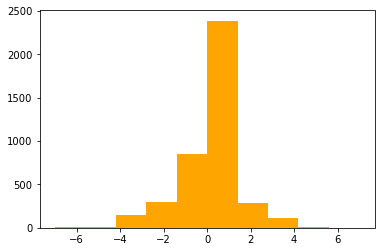

p_ttest = 0.02448057273285555


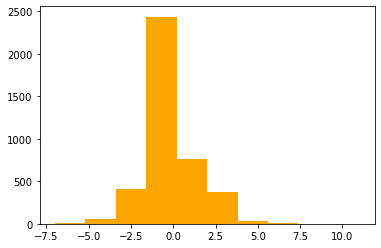

p_ttest = 0.0003491082718585127


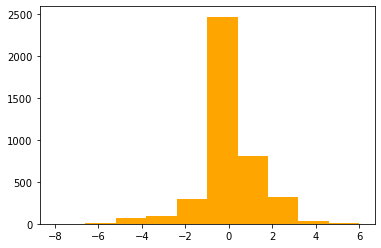

p_ttest = 0.04311431283115982


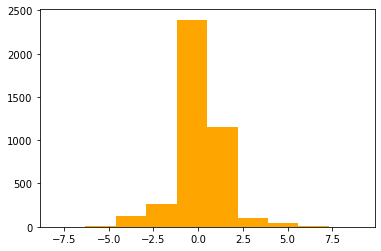

p_ttest = 0.029354321588700757


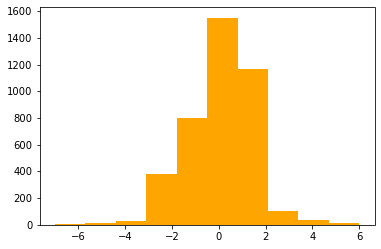

p_ttest = 0.035287788121701386


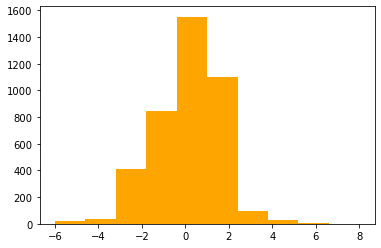

p_ttest = 0.017111970350834664


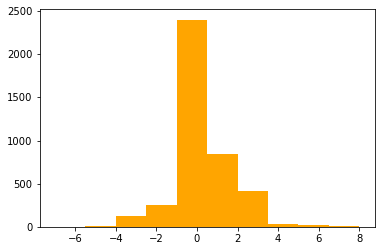

p_ttest = 0.02565190870502867


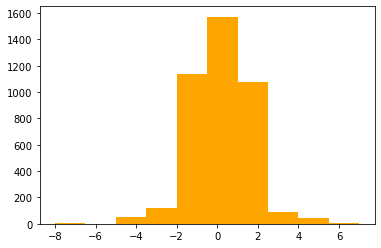

p_ttest = 0.03863286988639194


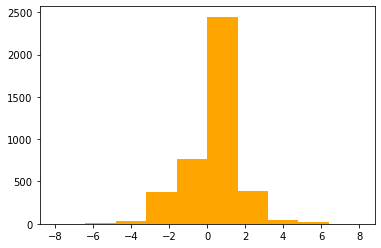

p_ttest = 0.009181865934301271


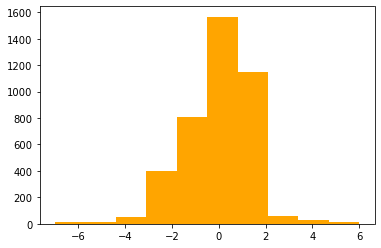

p_ttest = 0.014039269184915886


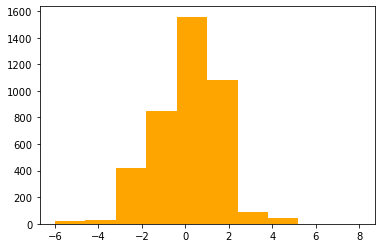

p_ttest = 0.0027074799905964266


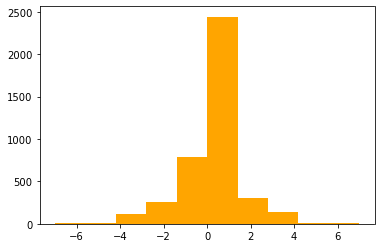

p_ttest = 0.04990860578724712


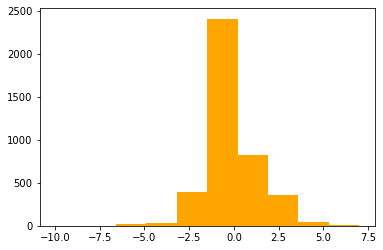

p_ttest = 0.0057620860418013085


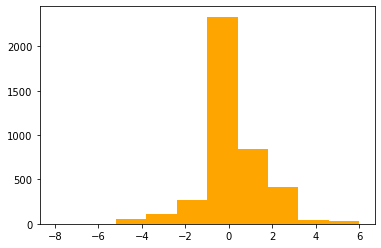

p_ttest = 0.02115620617235642


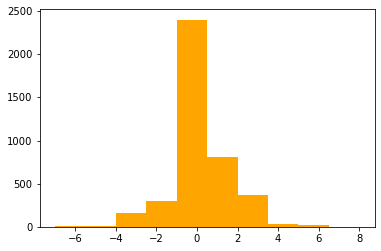

p_ttest = 0.0


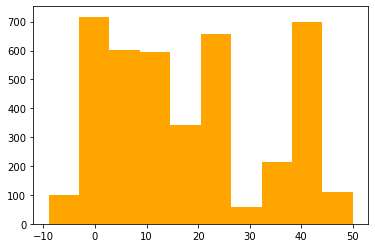

p_ttest = 0.0


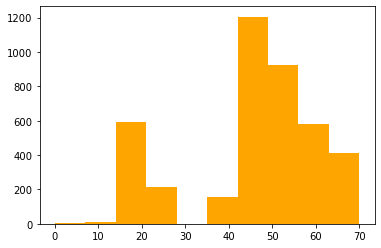

p_ttest = 0.0


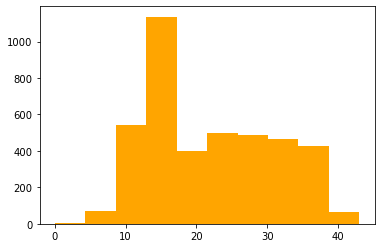

p_ttest = 0.00020911354713725732


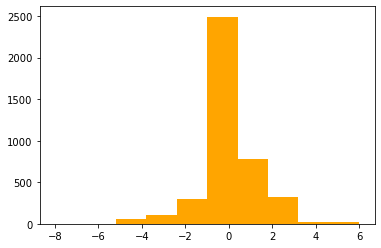

p_ttest = 0.015528394843514157


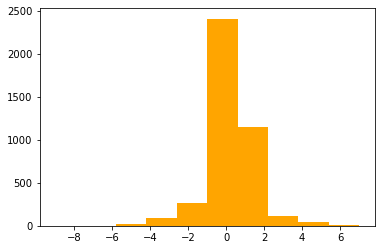

p_ttest = 0.0


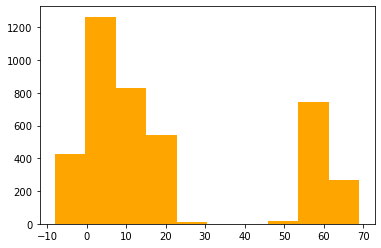

p_ttest = 0.039189845957509385


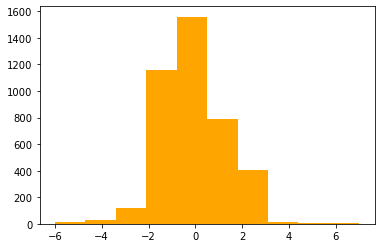

p_ttest = 0.0497646895827676


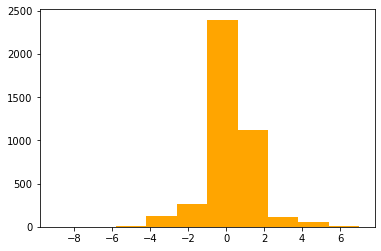

p_ttest = 0.04899956574535666


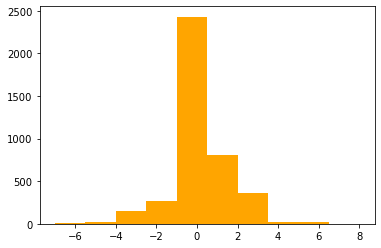

p_ttest = 0.0428064073511391


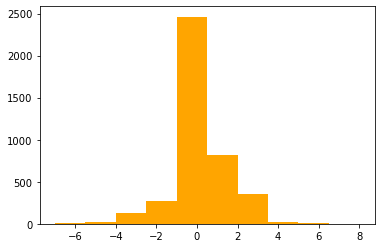

p_ttest = 0.009415102677421237


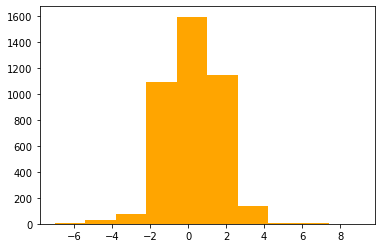

p_ttest = 0.027424405255874057


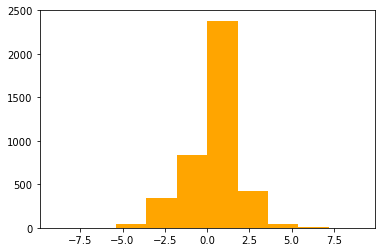

p_ttest = 0.0


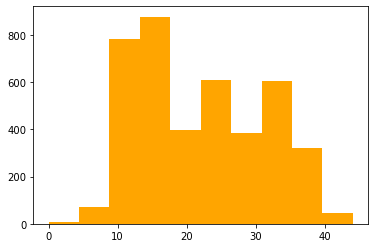

p_ttest = 0.018001549609419146


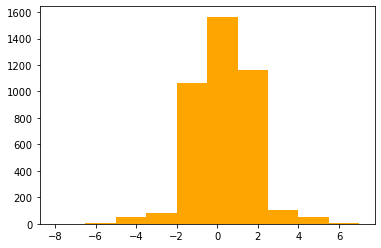

p_ttest = 0.031477097336778455


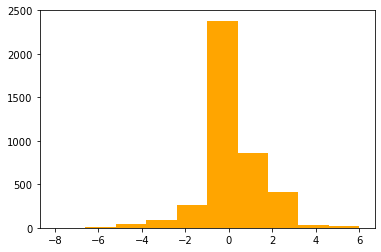

p_ttest = 0.0


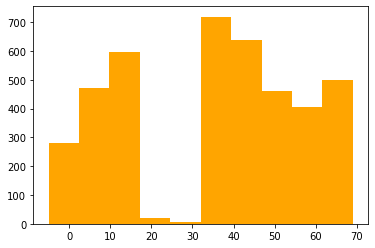

[('original_571201793.bmp', 'modified_571201793_person.bmp', 'person'),
 ('original_521531265.bmp', 'modified_521531265_person.bmp', 'person'),
 ('original_282656272.bmp', 'modified_282656272_way.bmp', 'way'),
 ('original_172627973.bmp', 'modified_172627973_part.bmp', 'part'),
 ('original_745472429.bmp', 'modified_745472429_week.bmp', 'week'),
 ('original_616493852.bmp', 'modified_616493852_person.bmp', 'person'),
 ('original_57301264.bmp', 'modified_57301264_week.bmp', 'week'),
 ('original_222868710.bmp', 'modified_222868710_life.bmp', 'life'),
 ('original_880902641.bmp', 'modified_880902641_point.bmp', 'point'),
 ('original_853381441.bmp', 'modified_853381441_work.bmp', 'work'),
 ('original_168422187.bmp', 'modified_168422187_life.bmp', 'life'),
 ('original_997767039.bmp', 'modified_997767039_work.bmp', 'work'),
 ('original_587182194.bmp', 'modified_587182194_place.bmp', 'place'),
 ('original_67997005.bmp', 'modified_67997005_hand.bmp', 'hand'),
 ('original_685689665.bmp', 'modified_

In [86]:
check_data(data)

#### видно, что часть графиков похожи на нормальное распределение с нулевым мат. ожиданием, а другие наоборот вообще не похожи на нормальное распределение и у них $p_{value} = 0$, также видно, что порог в 0.05 слишком большой, возьмем порог поменьше и посмотрим что будет

p_ttest = 0.0


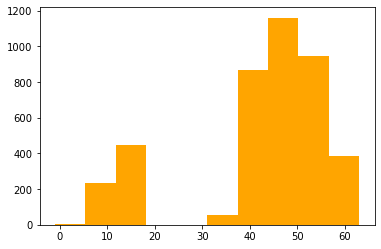

p_ttest = 0.0


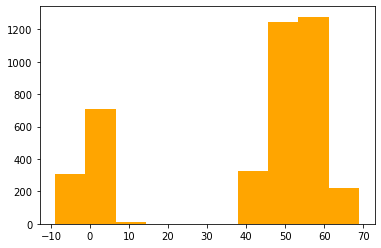

p_ttest = 0.0005317912549809853


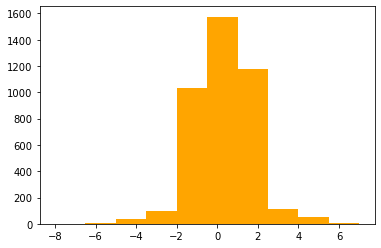

p_ttest = 0.0


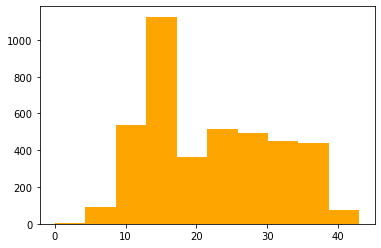

p_ttest = 0.0


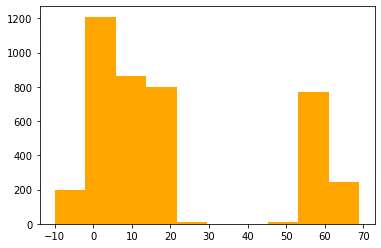

p_ttest = 0.0003491082718585127


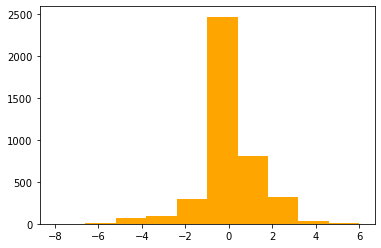

p_ttest = 0.0


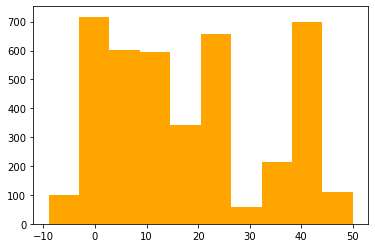

p_ttest = 0.0


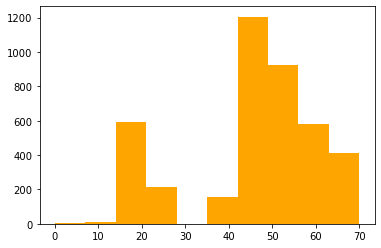

p_ttest = 0.0


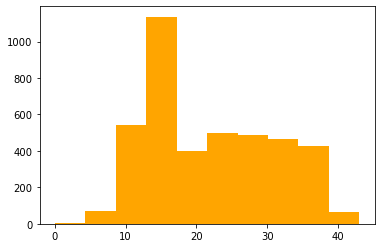

p_ttest = 0.00020911354713725732


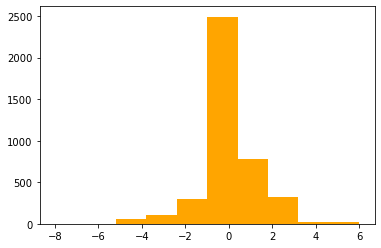

p_ttest = 0.0


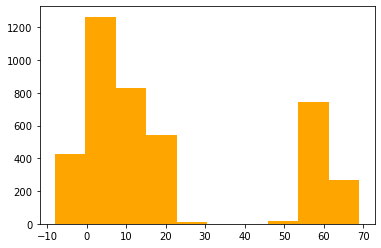

p_ttest = 0.0


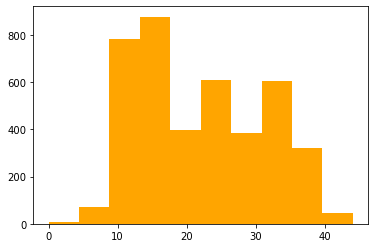

p_ttest = 0.0


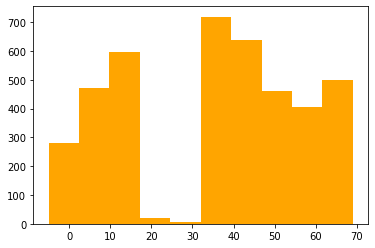

[('original_571201793.bmp', 'modified_571201793_person.bmp', 'person'),
 ('original_172627973.bmp', 'modified_172627973_part.bmp', 'part'),
 ('original_616493852.bmp', 'modified_616493852_person.bmp', 'person'),
 ('original_168422187.bmp', 'modified_168422187_life.bmp', 'life'),
 ('original_842126465.bmp', 'modified_842126465_fact.bmp', 'fact'),
 ('original_397542777.bmp', 'modified_397542777_week.bmp', 'week'),
 ('original_910234046.bmp', 'modified_910234046_hand.bmp', 'hand'),
 ('original_143277410.bmp', 'modified_143277410_group.bmp', 'group'),
 ('original_605667937.bmp', 'modified_605667937_life.bmp', 'life'),
 ('original_598452317.bmp', 'modified_598452317_person.bmp', 'person'),
 ('original_559156855.bmp', 'modified_559156855_fact.bmp', 'fact'),
 ('original_868042615.bmp', 'modified_868042615_life.bmp', 'life'),
 ('original_859744457.bmp', 'modified_859744457_number.bmp', 'number')]

In [87]:
check_data(data, 0.001)

### всё равно часть выборок ведут себя как нормальное распределение с мат. ожиданием ноль, уменьшим ещё порог

p_ttest = 0.0


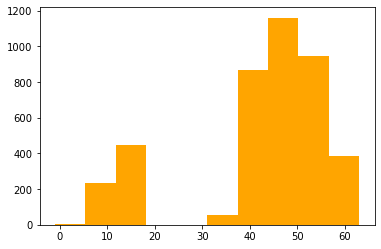

p_ttest = 0.0


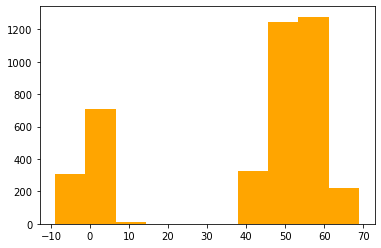

p_ttest = 0.0


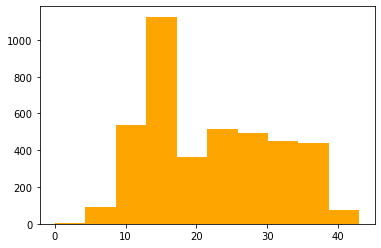

p_ttest = 0.0


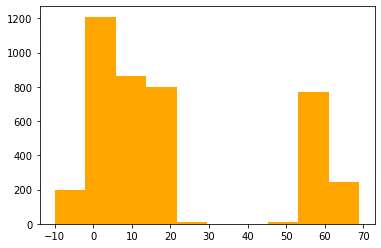

p_ttest = 0.0


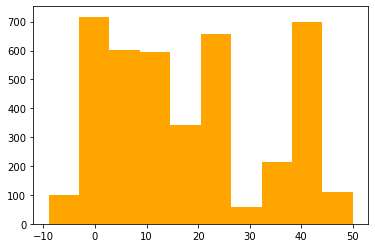

p_ttest = 0.0


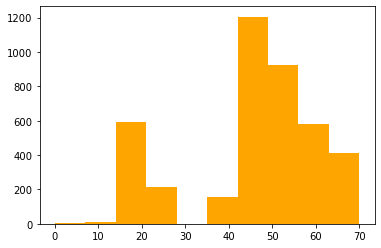

p_ttest = 0.0


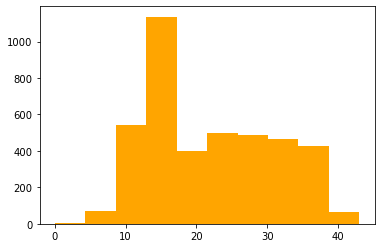

p_ttest = 0.0


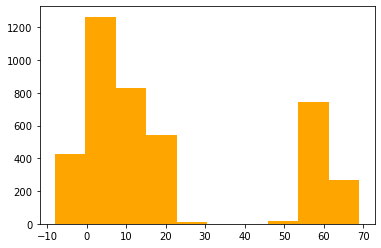

p_ttest = 0.0


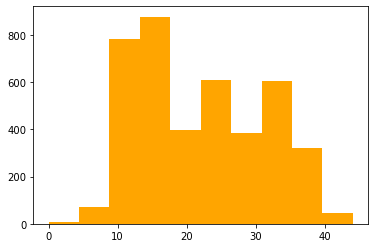

p_ttest = 0.0


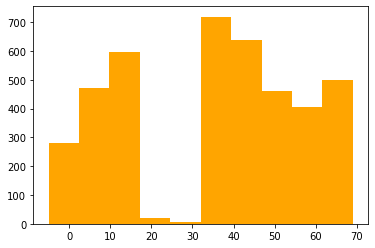

[('original_571201793.bmp', 'modified_571201793_person.bmp', 'person'),
 ('original_172627973.bmp', 'modified_172627973_part.bmp', 'part'),
 ('original_168422187.bmp', 'modified_168422187_life.bmp', 'life'),
 ('original_842126465.bmp', 'modified_842126465_fact.bmp', 'fact'),
 ('original_910234046.bmp', 'modified_910234046_hand.bmp', 'hand'),
 ('original_143277410.bmp', 'modified_143277410_group.bmp', 'group'),
 ('original_605667937.bmp', 'modified_605667937_life.bmp', 'life'),
 ('original_559156855.bmp', 'modified_559156855_fact.bmp', 'fact'),
 ('original_868042615.bmp', 'modified_868042615_life.bmp', 'life'),
 ('original_859744457.bmp', 'modified_859744457_number.bmp', 'number')]

In [88]:
check_data(data, 0.0001)

### такой порог подходит 

In [51]:
print("{} Процент от всех данных содержит зашифрованные слова".format(len(res) / len(data) * 100))

1.0 Процент от всех данных содержит зашифрованные слова


In [99]:
x = []
y = []
for image in res:
    original = np.int64(Image.open(os.path.join(dirpath, image[0])))
    mod = np.int64(Image.open(os.path.join(dirpath, image[1])))
    sample = (mod - original).flatten()
    for i in range(len(sample)):
        word = image[2]
        x.append(ord(word[i % len(word)]) - ord('a'))
        y.append(sample[i])

### ищем коэффициент альфа через линейную регрессию

In [100]:
lm = ols('y ~ x', data=pd.DataFrame({'y': y, 'x': x})).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.945e+06
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        00:51:27   Log-Likelihood:            -1.0155e+05
No. Observations:               40960   AIC:                         2.031e+05
Df Residuals:                   40958   BIC:                         2.031e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0289      0.025      1.155      0.248      -0.020       0.078
x              3.1317      0.002   1394.702      0.000       3.127       3.136
==============================================================================
Omnibus:                    22466.527   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1864580.472
Skew:                          -1.777   Prob(JB):                         0.00
Kurtosis:                      35.862   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

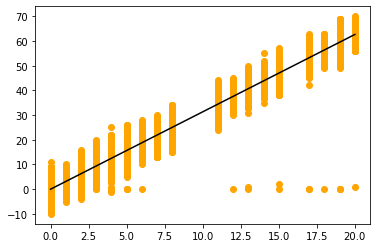

In [101]:
plt.scatter(x, y, color='orange')
x = np.array([i for i in range(21)])
y = 3.1317 * x
plt.plot(x, y, color='black')
plt.show()

#### альфа равна 3.1317 , теперь зная альфа, раскодируем слово

In [96]:
mod = Image.open(r'/Users/admin/Downloads/images_full/modified_test.bmp')
img = Image.open(r'/Users/admin/Downloads/images_full/original_test.bmp')
np_mod = np.int64(mod)
np_img  = np.int64(img)
difference = np_mod - np_img

### переберём периоды и посмотрим на графики

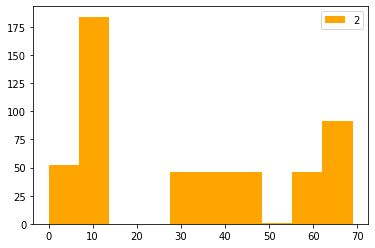

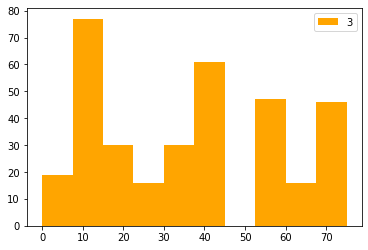

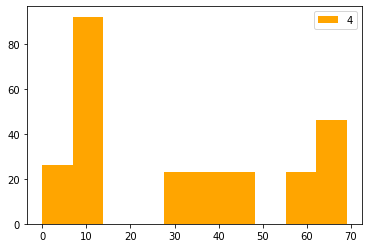

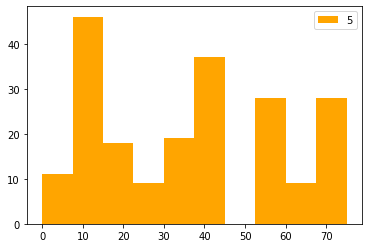

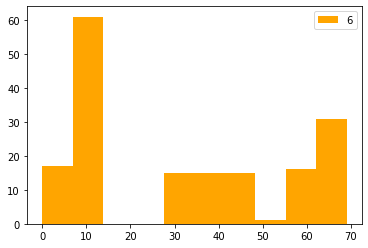

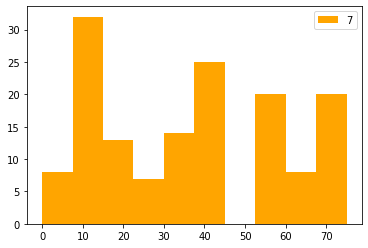

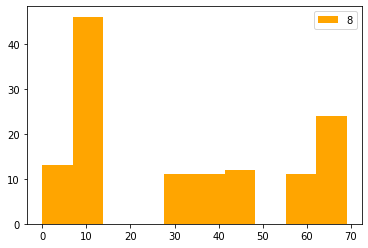

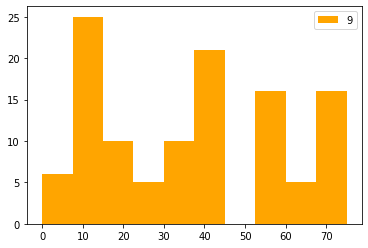

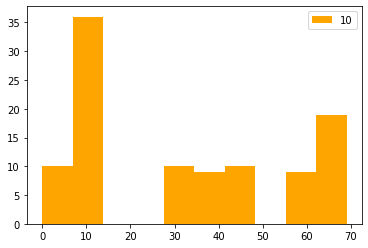

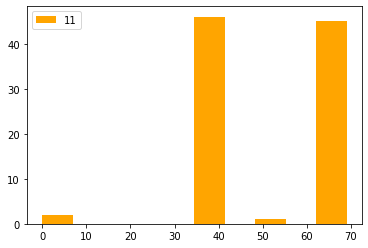

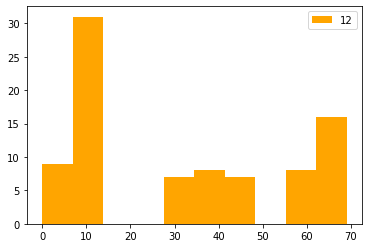

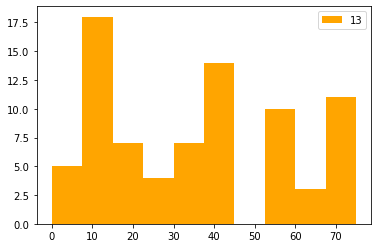

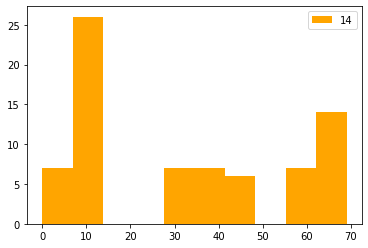

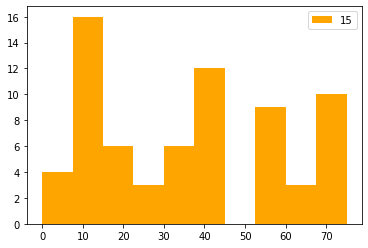

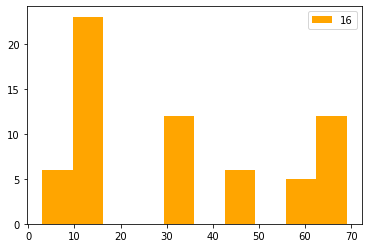

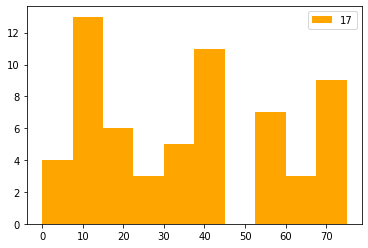

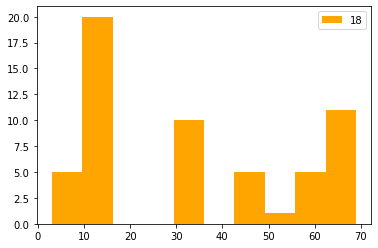

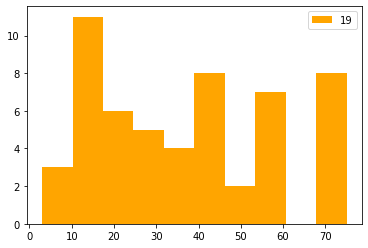

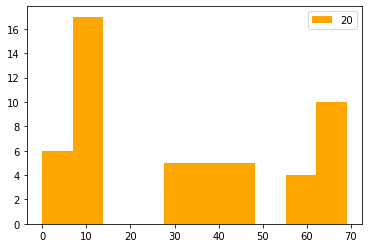

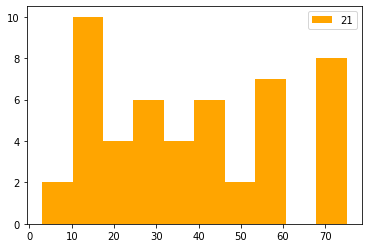

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 0]


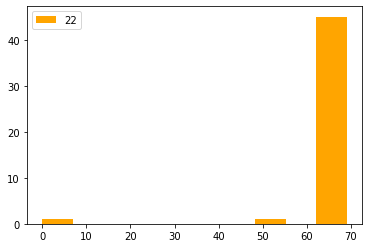

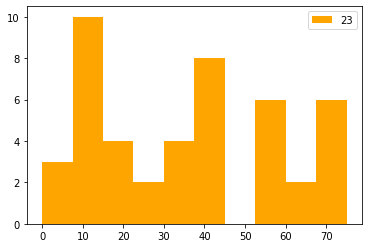

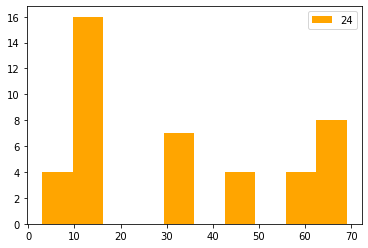

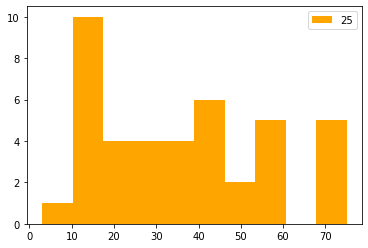

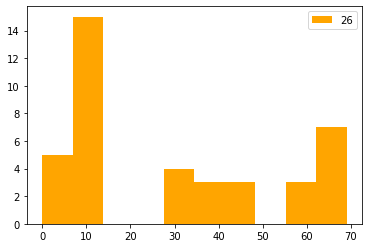

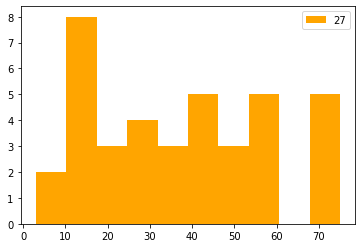

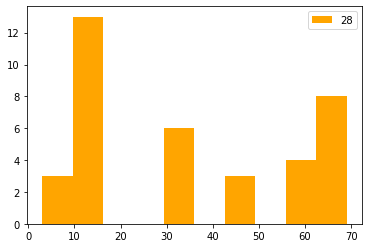

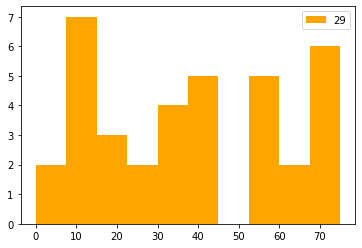

In [97]:
for period in range(2,30):
    letters_alpha = {i: [] for i in range(period)}
    dif_flat = difference.flatten()
    for i in range(len(dif_flat)):
        letters_alpha[i % period].append(dif_flat[i])
    if period == 22:
        print(letters_alpha[1])
    plt.hist(letters_alpha[0], label=period, color='orange')
    plt.legend()
    plt.show()

(array([2., 7., 3., 2., 4., 5., 0., 5., 2., 6.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

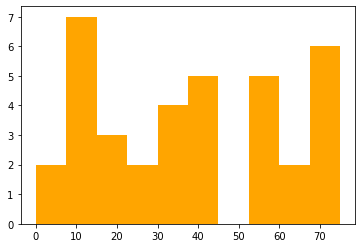

In [98]:
plt.hist(letters_alpha[0], color='orange')

In [95]:
period = 22
letters= []
array = []
for i in range(period):
    c = 0
    array.append([])
    while period * c + i < len(dif_flat):
        array[len(array) - 1].append(dif_flat[period * c + i])
        c += 1
    letter = chr(round(sum(array[len(array) - 1]) / len(array[len(array) - 1]) / 3) + ord('a'))
    letters.append(letter)
    print(letter, sum(array[len(array) - 1]) / len(array[len(array) - 1]) / 3)

w 22.397163120567374
h 7.177304964539007
e 4.24113475177305
r 17.29078014184397
e 4.24113475177305
s 18.26950354609929
u 19.574468085106382
h 7.177304964539007
e 4.24113475177305
m 12.397163120567376
o 14.354609929078014
n 13.375886524822695
e 4.333333333333333
z 24.862318840579707
m 11.666666666666666
e 4.333333333333333
b 1.0
p 14.666666666666666
x 23.0
t 18.666666666666668
k 10.333333333333334
i 8.333333333333334
